In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew 

In [2]:
test  = pd.read_csv('test_new.csv') 
train = pd.read_csv('train_new.csv') 

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal
1,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
2,863,20,RL,81.0,9672,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,5,2010,WD,Normal
3,864,20,RL,70.0,7931,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2009,WD,Normal
4,865,20,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,New,Partial


In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID  = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop( "Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (860, 81) 
The test data size before dropping Id feature is : (600, 80) 

The train data size after dropping Id feature is : (860, 80) 
The test data size after dropping Id feature is : (600, 79) 


## Data Processing

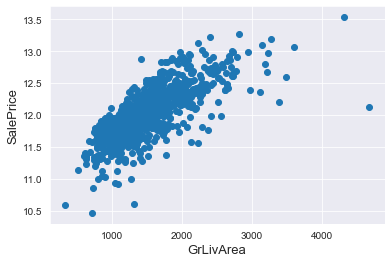

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

**Q1. 위 그림에서 이상치로 판단되는 데이터를 제거하시오.**  
사람마다 기준은 다르나 저는 오른쪽 따로노는 아이가 이상하군요

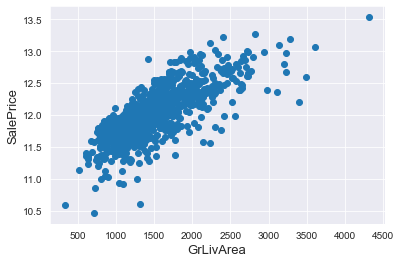

In [7]:
#Deleting outliers
train = train.drop(train['GrLivArea'].idxmax(), axis=0)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Features engineering

In [8]:
ntrain = train.shape[0]
ntest  = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1459, 79)


In [9]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,...,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,...,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,...,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,...,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,...,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


### Missing Data

In [10]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100 # 결측치의 비율
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30] # 결측치가 있는 경우만
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520219
MiscFeature,96.298835
Alley,93.762851
Fence,80.740233
FireplaceQu,47.292666
LotFrontage,17.751885
GarageYrBlt,5.551748
GarageType,5.551748
GarageQual,5.551748
GarageFinish,5.551748


Text(0.5, 1.0, 'Percent missing data by feature')

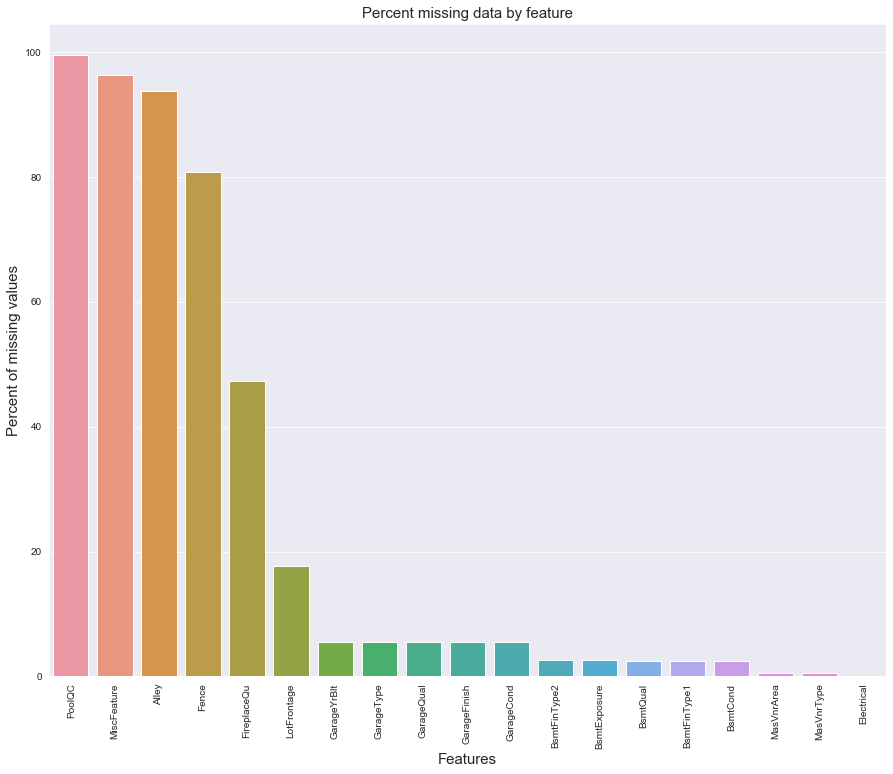

In [11]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Data Correlation**


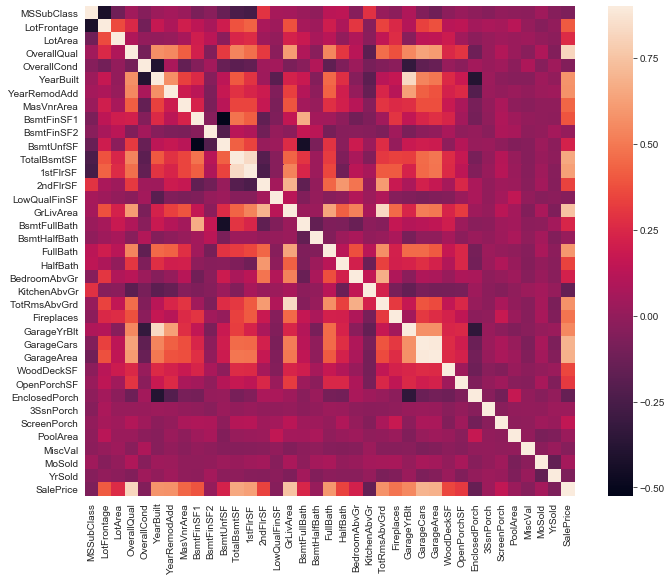

In [12]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Imputing missing values 

**Q3.결측치를 None으로 바꿔봅시다**  
**그냥 바꾸지만 마시고 왜 None으로 바꾸는지 한번 생각해보세요**

- **PoolQC** : data description says NA means **"No  Pool"**. That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

In [13]:
# PoolQC : pool quailty
all_data["PoolQC"].fillna('None', inplace=True)

- **MiscFeature** : data description says NA means **"no misc feature"**


In [14]:
# MiscFeature: Miscellaneous feature not covered in other categories
all_data["MiscFeature"].fillna('None', inplace=True)

- **Alley** : data description says NA means **"no alley access"**

In [15]:
all_data["Alley"][all_data["Alley"].notnull()].head()

21    Grvl
30    Pave
56    Pave
79    Grvl
87    Pave
Name: Alley, dtype: object

In [16]:
# Alley: Type of alley access
all_data["Alley"].fillna('None', inplace=True)

- **Fence** : data description says NA means **"no fence"**

In [17]:
all_data["Fence"][all_data["Fence"].isna()].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

In [18]:
# Fence: Fence quality
all_data["Fence"].fillna('None', inplace=True)

- **FireplaceQu** : data description says NA means **"no fireplace"**

In [19]:
# FireplaceQu: Fireplace quality 
all_data["FireplaceQu"].fillna('None', inplace=True)

- **LotFrontage** : 

 **Q4. the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood. 인 변수입니다. 그러면 결측치를 어떻게 바꾸는게 좋을까요?**

In [20]:
# LotFrontage: Linear feet of street connected to property
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))

- **Q5. GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

In [21]:
all_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].head()

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,RFn,TA,TA
1,Attchd,RFn,TA,TA
2,Attchd,RFn,TA,TA
3,Detchd,Unf,TA,TA
4,Attchd,RFn,TA,TA


In [22]:
# GarageType: Garage location
# GarageFinish: Interior finish of the garage
# GarageQual: Garage quality
# GarageCond: Garage condition
# -> 범주형 값이라서 None으로 대체

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

- **Q6. GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [23]:
all_data[['GarageYrBlt', 'GarageArea', 'GarageCars']].head()

,GarageYrBlt,GarageArea,GarageCars
0,2003.0,548,2
1,1976.0,460,2
2,2001.0,608,2
3,1998.0,642,3
4,2000.0,836,3


In [24]:
# GarageYrBlt: Year garage was built
# GarageCars: Size of garage in car capacity 
# GarageArea: Size of garage in square feet 
# -> 수치형이라 0으로 대체

# Q. 근데 GarageYrBlt를 0으로 대체하는 것이 옳은 일인가??

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col].fillna(0, inplace=True)

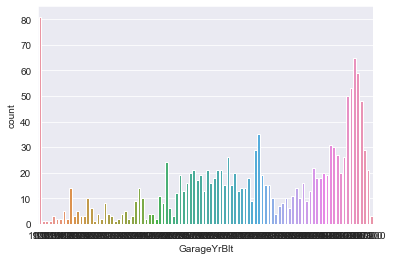

In [25]:
sns.countplot(all_data['GarageYrBlt'])
# all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].mean(), inplace=True)

- **Q7. BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [26]:
all_data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,706,0,150,856,1,0
1,978,0,284,1262,0,1
2,486,0,434,920,1,0
3,216,0,540,756,1,0
4,655,0,490,1145,1,0


In [27]:
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0, inplace=True)

- **Q8. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.


In [28]:
all_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,Gd,TA,No,GLQ,Unf
1,Gd,TA,Gd,ALQ,Unf
2,Gd,TA,Mn,GLQ,Unf
3,TA,Gd,No,ALQ,Unf
4,Gd,TA,Av,GLQ,Unf


In [29]:
# BsmtQual: Quality of the basement
# BsmtCond: General condition of the basement
# BsmtExposure: Walkout or garden level basement walls
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinSF2: Type 2 finished square feet

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None', inplace=True)

- **Q9. MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 


In [30]:
all_data[["MasVnrType", "MasVnrArea"]].head()

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0


In [31]:
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'  

**Q10. MSZoning에서 가장 많이 존재하는 값으로 결측치를 대체하세요**

In [32]:
# MSZoning: The general zoning classification
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode())

- **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa"  and 2 NA . Since the house with 'NoSewa' is in the training set, **this feature won't help in predictive modelling**. We can then safely  remove it.


In [33]:
# Utilities: Type of utilities available
# 3개의 데이터 제외 AllPub -> feature 제거

all_data = all_data.drop(['Utilities'], axis=1)

- **Functional** : data description says NA means typical

In [34]:
all_data["Functional"].head()

0    Typ
1    Typ
2    Typ
3    Typ
4    Typ
Name: Functional, dtype: object

In [35]:
# Functional: Home functionality rating
all_data["Functional"] = all_data["Functional"].fillna("Typ")

- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


**Q11.  가장 많이 존재하는 값으로 결측치를 대체하세요**

In [36]:
# Electrical: Electrical system
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode())

- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.


In [37]:
# KitchenQual: Kitchen quality
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode())

- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string


In [38]:
all_data[['Exterior1st', 'Exterior2nd']].head()

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,Wd Shng
4,VinylSd,VinylSd


In [39]:
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode())
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode())

- **SaleType** : Fill in again with most frequent which is "WD"

In [40]:
# SaleType: Type of sale
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode())

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None


In [41]:
# MSSubClass: The building class
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Is there any remaining missing value ? 

In [42]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
Electrical,0.06854


### More features engeneering

**Transforming some numerical variables that are really categorical**   

숫자형태를 한 값일 뿐 실제 연속형도 숫자 데이터도 아니죠? 따라서 문자형식으로 바꾼후 라벨링 인코더 하겠습니다.

**Q12. 데이터를 문자형으로 바꾸세요.**

In [43]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].apply(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].apply(str)
all_data['MoSold'] = all_data['MoSold'].apply(str)

**Label Encoding some categorical variables that may contain information in their ordering set** 

**Q13. LabelEncoder로 해당 범주형 데이터를 바꿔보세요..**

In [44]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

label_encoder = LabelEncoder()
for col in cols:
    all_data[col] = label_encoder.fit_transform(all_data[col])

In [45]:
# shape        
print('Shape all_data: {}'.format(all_data.shape))

# Shape all_data: (1459, 78)

Shape all_data: (1459, 78)


**Adding one more important feature**

In [46]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

**Skewed features**

In [47]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.443278
PoolArea,14.807992
LotArea,12.290047
3SsnPorch,10.290132
LowQualFinSF,8.998885
LandSlope,4.806884
KitchenAbvGr,4.482026
BsmtFinSF2,4.249219
ScreenPorch,4.116334
BsmtHalfBath,4.097541


**Box Cox Transformation of (highly) skewed features**

We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. 

Note that setting \\( \lambda = 0 \\) is equivalent to log1p used above for the target variable.  

See [this page][1] for more details on Box Cox Transformation as well as [the scipy function's page][2]
[1]: http://onlinestatbook.com/2/transformations/box-cox.html
[2]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [48]:
skewness = skewness[abs(skewness) > 0.75]


from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

**Getting dummy categorical features**

**Q14. 더미화하세요.**

In [49]:
all_data = pd.get_dummies(all_data)
print(all_data.shape) # (1459, 221)

(1459, 221)


Getting the new train and test sets. 

In [50]:
train = all_data[:ntrain]
test  = all_data[ntrain:]   

In [53]:
print(train.shape)
print(y_train.shape)

print(test.shape)

(859, 221)
(859,)
(600, 221)


---

# Modelling

#### 이 아래부터의 과정은 앙상블을 정말 모르겠다.(코드) 그런 분들을 위해 참조용으로 있을 뿐. 알아서 하셔도 무방합니다.

### 1. train test split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y_train)

In [55]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(644, 221)
(215, 221)
(644,)
(215,)


In [160]:
variance_inflation_factor(train.values, 0) == numpy.inf

False

In [ ]:
# train_drop = train.copy()

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy

vif_list = []
feature_list = []
vif = pd.DataFrame()
for i in range(train_drop.shape[1]):
    vif_val = variance_inflation_factor(train_drop.values, i)
    if vif_val != numpy.inf :
        vif_list.append(vif_val)
        feature_list.append(train_drop.columns[i])
        
vif['VIF'] = vif_list
vif['Feature'] = feature_list

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [208]:
vif.sort_values(by='VIF', ascending=False).head(10)

,VIF,Feature
42,13.298004,PoolQC
41,11.912847,PoolArea
0,7.049130,1stFlrSF
45,6.201859,TotRmsAbvGrd
46,6.191288,TotalBsmtSF
23,5.991522,GarageCars
6,5.218520,BsmtFinSF1
39,4.886263,OverallQual
7,4.832772,BsmtFinSF2
13,4.496316,BsmtUnfSF


In [206]:
# VIF 확인하면서 하나의 설명변수 제거해봄
train_drop = train_drop.drop('GarageYrBlt', axis=1)
train_drop = train_drop.drop('GrLivArea', axis=1)
train_drop = train_drop.drop('MiscVal', axis=1)
train_drop = train_drop.drop('TotalSF', axis=1)
train_drop = train_drop.drop('GarageArea', axis=1)
train_drop = train_drop.drop('MSSubClass', axis=1)
train_drop = train_drop.drop('2ndFlrSF', axis=1)
train_drop = train_drop.drop('MasVnrArea', axis=1)
train_drop = train_drop.drop('YearBuilt', axis=1)

In [210]:
# VIF 문제 어느정도 해결한 X_drop 데이터셋 만들었다
X_drop_train = X_train.drop(['GarageYrBlt', 'GrLivArea', 'MiscVal', 'TotalSF', 'GarageArea', 'MSSubClass', '2ndFlrSF', 'MasVnrArea', 'YearBuilt'], axis=1)
X_drop_test  = X_test.drop(['GarageYrBlt', 'GrLivArea', 'MiscVal', 'TotalSF', 'GarageArea', 'MSSubClass', '2ndFlrSF', 'MasVnrArea', 'YearBuilt'], axis=1)

In [126]:
from sklearn.preprocessing import StandardScaler

# scaling 진행한 데이터셋 따로 만들어둔다.
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_ss_train = standard_scaler.transform(X_train)
X_ss_test  = standard_scaler.transform(X_test)

In [105]:
# 결과를 담을 딕셔너리
rmse_result = {}

### 2-1. Regression

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [106]:
linear_regression = LinearRegression()
ridge_regression = Ridge()
lasso_regression = Lasso()
elasticnet = ElasticNet()

- **Linear Regression**

In [230]:
linear_regression.fit(X_train, y_train)
pred = linear_regression.predict(X_test)

print( np.sqrt(mean_squared_error(y_test, pred)) )
rmse_result['Linear_regression'] = np.sqrt(mean_squared_error(y_test, pred))

0.15515113535207622


- **Ridge Regression**

In [228]:
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_cv = GridSearchCV(ridge_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 10}
0.11827400698580509


In [340]:
param = {'alpha':np.arange(1, 100, 1)}

grid_cv = GridSearchCV(ridge_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

rmse_result['Ridge_9'] = np.sqrt(-grid_cv.best_score_)

{'alpha': 9}
0.1182415303300253


In [128]:
# scaling한 데이터

param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_cv = GridSearchCV(ridge_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_ss_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 100}
0.11974917966761613


In [130]:
# scaling한 데이터

param = {'alpha':np.arange(50, 1000, 1)}

grid_cv = GridSearchCV(ridge_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_ss_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 162}
0.11885536377679955


In [225]:
# VIF 높은 설명변수 제거한 데이터

param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_cv = GridSearchCV(ridge_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_drop_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 10}
0.12355568570739905


In [226]:
# VIF 높은 설명변수 제거한 데이터

param = {'alpha':np.arange(1, 100, 1)}

grid_cv = GridSearchCV(ridge_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_drop_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 9}
0.12349236778801861


- **Lasso Regression**

In [232]:
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_cv = GridSearchCV(lasso_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 0.001}
0.12069522315683347


In [233]:
param = {'alpha':np.arange(0.0005, 0.005, 0.0001)}

grid_cv = GridSearchCV(lasso_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 0.0009000000000000002}
0.12065839111644965


In [234]:
rmse_result['Lasso_regression_0.0009'] = np.sqrt(-grid_cv.best_score_)

In [235]:
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_cv = GridSearchCV(lasso_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_ss_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 0.01}
0.12081686861229281


In [236]:
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_cv = GridSearchCV(lasso_regression, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_drop_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 0.001}
0.12512773447808265


- **EleasticNet**

In [237]:
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
        'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

grid_cv = GridSearchCV(elasticnet, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 0.01, 'l1_ratio': 0.1}
0.11971928233049768


In [238]:
param = {'alpha':np.arange(0.001, 0.05, 0.001),
        'l1_ratio':np.arange(0.1, 0.95, 0.05)}

grid_cv = GridSearchCV(elasticnet, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'alpha': 0.006, 'l1_ratio': 0.1}
0.11866557944777312


In [239]:
rmse_result['Elastic_0.006_0.1'] = np.sqrt(-grid_cv.best_score_)

In [240]:
# Linear Regression - 0.15515113535207622
# Ridge - 0.1182415303300253 (alpha 9)
# Lasso - 0.12065839111644965 (alpha 0.0009)
# ElasticNet - 0.11866557944777312 (alpha 0.006, l1_ratio 0.1)

# scaling한 데이터, VIF 높은 변수 제거한 데이터보다 원본데이터의 결과가 좋았다.

### 2-2. KNN Regressor

In [241]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
pred = knn_regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

0.26620579530202954

In [242]:
param = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
        'weights':['uniform', 'distance']}

grid_cv = GridSearchCV(knn_regressor, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'n_neighbors': 5, 'weights': 'distance'}
0.23319229193804838


In [243]:
# rmse_result['KNN'] = np.sqrt(-grid_cv.best_score_)
rmse_result['KNN'] = np.sqrt(-grid_cv.best_score_)

### 2-3. Decision Tree

In [244]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
pred = dt_regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

0.24479285744513135

In [245]:
param = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 40, 60, 80, 100],
        'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8],
        'min_samples_split':[2, 3, 4, 5, 6, 7, 8],
        'max_features':["auto", "sqrt"]}

grid_cv = GridSearchCV(dt_regressor, param, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_train, y_train)

print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 4}
0.1829060267642516


In [246]:
# rmse_result['DT'] = np.sqrt(-grid_cv.best_score_)
rmse_result['DT'] = np.sqrt(-grid_cv.best_score_)

### 2-4. Ensemble - Bagging

In [248]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
pred = rf_regressor.predict(X_test)

np.sqrt(mean_squared_error(y_test, pred))

0.16795587646349158

In [269]:
param = {'max_depth':[3, 30, 300, 3000],
        'min_samples_leaf':[2, 3, 4, 5],
        'min_samples_split':[2, 3, 4, 5]}

grid_cv = GridSearchCV(rf_regressor, param, cv=2, scoring='neg_mean_squared_error', verbose=2)
grid_cv.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=4, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=5 ............
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=5, total=   0.2s
[CV] max_depth=3, min_samples_leaf=3, min_samples_split=

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   56.9s finished


{'max_depth': 300, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.14779732313198365


In [270]:
print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'max_depth': 300, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.14779732313198365


In [276]:
param = {'max_depth':np.arange(200, 400, 20),
        'min_samples_leaf':[2, 3, 4],
        'min_samples_split':[3, 4, 5]}
         
grid_cv = GridSearchCV(rf_regressor, param, cv=2, scoring='neg_mean_squared_error', verbose=2)
grid_cv.fit(X_train, y_train)

Fitting 2 folds for each of 90 candidates, totalling 180 fits
[CV] max_depth=200, min_samples_leaf=2, min_samples_split=3 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=200, min_samples_leaf=2, min_samples_split=3, total=   0.5s
[CV] max_depth=200, min_samples_leaf=2, min_samples_split=3 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=200, min_samples_leaf=2, min_samples_split=3, total=   0.5s
[CV] max_depth=200, min_samples_leaf=2, min_samples_split=4 ..........
[CV]  max_depth=200, min_samples_leaf=2, min_samples_split=4, total=   0.4s
[CV] max_depth=200, min_samples_leaf=2, min_samples_split=4 ..........
[CV]  max_depth=200, min_samples_leaf=2, min_samples_split=4, total=   0.4s
[CV] max_depth=200, min_samples_leaf=2, min_samples_split=5 ..........
[CV]  max_depth=200, min_samples_leaf=2, min_samples_split=5, total=   0.4s
[CV] max_depth=200, min_samples_leaf=2, min_samples_split=5 ..........
[CV]  max_depth=200, min_samples_leaf=2, min_samples_split=5, total=   0.4s
[CV] max_depth=200, min_samples_leaf=3, min_samples_split=3 ..........
[CV]  max_depth=200, min_samples_leaf=3, min_samples_split=3, total=   0.4s
[CV] max_depth=200, min_samples_leaf=3, min_samples_split=3 ..........
[CV]  max_depth=200, min_samples_leaf=3, min_samples_split=3, total=   0.4s
[CV] max_depth=200, min_samples_leaf=3, mi

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [277]:
print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'max_depth': 220, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.14703904343461116


In [278]:
rf = RandomForestRegressor(max_depth=220, min_samples_leaf=2, min_samples_split=3)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

0.16532339178888225


In [279]:
rmse_result['RF'] = np.sqrt(mean_squared_error(y_test, pred))

### 2-5. Ensemble - Boosting

In [282]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor

In [292]:
ada = AdaBoostRegressor()
gbm = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()

- **AdaBoost**

In [293]:
ada.fit(X_train, y_train)
pred = ada.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

0.1833060095586201


In [299]:
param = {'n_estimators':[100, 1000, 10000],
         'learning_rate':[0.01, 0.1, 1, 10]}

grid_cv = GridSearchCV(ada, param, cv=2, scoring='neg_mean_squared_error', verbose=2)
grid_cv.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. learning_rate=0.01, n_estimators=100, total=   0.4s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............. learning_rate=0.01, n_estimators=100, total=   0.4s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1000, total=   3.3s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1000, total=   3.4s
[CV] learning_rate=0.01, n_estimators=10000 ..........................
[CV] ........... learning_rate=0.01, n_estimators=10000, total=  33.9s
[CV] learning_rate=0.01, n_estimators=10000 ..........................
[CV] ........... learning_rate=0.01, n_estimators=10000, total=  36.8s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   0.4s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   0.4s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.4min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [300]:
print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'learning_rate': 1, 'n_estimators': 10000}
0.15588572572453158


In [303]:
ada = AdaBoostRegressor(n_estimators=10000, learning_rate=1)
ada.fit(X_train, y_train)
pred = ada.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

0.17694420666600016


In [304]:
rmse_result['Ada'] = np.sqrt(mean_squared_error(y_test, pred))

- **Gradient Boosting**

In [314]:
gbm.fit(X_train, y_train)
pred = gbm.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

0.15897658044394217


In [310]:
param = {'n_estimators':[10, 100, 100],
         'learning_rate':[0.01, 0.1],
        'max_depth':[1, 2, 3]}

grid_cv = GridSearchCV(gbm, param, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................
[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................
[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................
[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................
[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................
[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   17.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=2,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000,
                                                 n_iter_no_change=None,
              

In [311]:
print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.12797639600559013


In [313]:
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm.fit(X_train, y_train)
pred = ada.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

0.17694420666600016


In [315]:
gbm.fit(X_train, y_train)
pred = gbm.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

0.15985786334653418


In [316]:
# 기본으로 하자.
rmse_result['GBM'] = np.sqrt(mean_squared_error(y_test, pred))

- **XGBoost**

In [317]:
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

[22:04:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1586579694207004


In [320]:
param = {'n_estimators':[10, 100, 1000],
         'learning_rate':[0.01, 0.1],
        'max_depth':[1, 2, 3]}

grid_cv = GridSearchCV(xgb, param, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[22:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[22:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.0min finished


[22:07:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [1, 2, 3],
                         'n_estimators': [10, 100, 10

In [321]:
print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
0.12392177467990802


In [322]:
xgb = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=1000)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

[22:09:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.15724626209762013


In [323]:
rmse_result['XGB'] = np.sqrt(mean_squared_error(y_test, pred))

- **Light GBM**

In [324]:
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

0.15538648592422497


In [325]:
param = {'n_estimators':[10, 100, 1000],
         'learning_rate':[0.01, 0.1],
        'max_depth':[1, 2, 3]}

grid_cv = GridSearchCV(lgbm, param, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................
[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................
[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................
[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=10 ................
[CV] . learning_rate=0.01, max_depth=1, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   21.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [1, 2, 3],
                         'n_estimators': [10, 100, 1000]},
             pre_dispatch='2*n_jobs', refi

In [326]:
print( grid_cv.best_params_ )
print( np.sqrt(-grid_cv.best_score_) )

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
0.1290771417508497


In [327]:
lgbm = LGBMRegressor(learning_rate=0.01, max_depth=3, n_estimators=1000)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

0.15155254978685578


In [328]:
rmse_result['LGBM'] = np.sqrt(mean_squared_error(y_test, pred))

### 2-6. Ensemble - Voting

In [341]:
pd.Series(rmse_result).sort_values()

Ridge_9                    0.118242
Elastic_0.006_0.1          0.118666
Lasso_regression_0.0009    0.120658
LGBM                       0.151553
Linear_regression          0.155151
XGB                        0.157246
GBM                        0.159858
RF                         0.165323
Ada                        0.176944
DT                         0.182906
KNN                        0.233192
dtype: float64

In [574]:
from sklearn.ensemble import VotingRegressor

linear = LinearRegression()
ridge = Ridge(alpha=9)
elasticNet = ElasticNet(alpha=0.006, l1_ratio=0.1)
lasso = Lasso(alpha=0.0009)

gbm = GradientBoostingRegressor()
lgbm = LGBMRegressor(learning_rate=0.01, max_depth=3, n_estimators=800)
xgb = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=1000)

estimators = [('Linear', linear), ('Ridge', ridge), ('ElasticNet', elasticNet), ('Lasso', lasso), ('GBM', gbm), ('LGBM', lgbm), ('XGB', xgb)]
#  list of (str, estimator) tuples
voting = VotingRegressor(estimators)

In [559]:
voting.fit(X_train, y_train)
pred = voting.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

[23:17:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.14171269659634708


In [575]:
estimators = [('Lasso', lasso), ('Linear', linear), ('LGBM', lgbm)]
voting = VotingRegressor(estimators)
voting.fit(X_train, y_train)
pred = voting.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred)))

0.13878997006447827


### 2-7. Ensemble - Stacking

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model. 

The procedure, for the training part, may be described as follows:


1. Split the total training set into two disjoint sets (here **train** and .**holdout** )

2. Train several base models on the first part (**train**)

3. Test these base models on the second part (**holdout**)

4. Use the predictions from 3)  (called  out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs  to train a higher level learner called **meta-model**.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration,  we train every base model on 4 folds and predict on the remaining fold (holdout fold). 

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as 
new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of  all base models on the test data  and used them as **meta-features**  on which, the final prediction is done with the meta-model.


![Faron](http://i.imgur.com/QBuDOjs.jpg)

(Image taken from [Faron](https://www.kaggle.com/getting-started/18153#post103381))

On this gif, the base models are algorithms 0, 1, 2 and the meta-model is algorithm 3. The entire training dataset is 
A+B (target variable y known) that we can split into train part (A) and holdout part (B). And the test dataset is C. 

B1 (which is the prediction from the holdout part)  is the new feature used to train the meta-model 3 and C1 (which
is the prediction  from the test dataset) is the meta-feature on which the final prediction is done. 

**Stacking averaged Models Class**

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model 
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**Stacking Averaged models Score**

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (## 자유),
                                                 meta_model = ## 자유)

score = rmsle_cv(stacked_averaged_models)                 
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Final Training and Prediction

**StackedRegressor:**

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmsle(y_train, stacked_train_pred))

#같은 방식으로 여러 모델을 학습하고 예측값을 뺴보세요.

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train, ### )) # 예측값을 앙상블 가중합한 값과 rmse값을 봐보자! 

**Ensemble prediction:**

In [ ]:
ensemble =  # 앙상블 결과 저장 

**Submission**

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)